In [52]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
from imblearn.under_sampling import RandomUnderSampler

In [53]:
# Load the dataset
data_path = "kddcup99_csv.csv" 

# Read the data into a Pandas DataFrame

data = pd.read_csv(data_path)

In [54]:
probe_categories = ['ipsweep', 'nmap', 'portsweep', 'satan']

# Create a new column 'label' with binary labels
data['label'] = data['label'].apply(lambda x: 1 if x in probe_categories else 0)

In [55]:
# Assuming you have already executed the code to create 'Is_Probe' column
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,0
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,0
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,0
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,0
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,0


In [56]:
# Preprocessing

encoder = LabelEncoder()
encoded_labels = encoder.fit_transform(data['label'])

# Encode categorical variables using LabelEncoder
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

In [57]:
# Get the mapping of numeric labels to original label names
label_mapping = {index: label for index, label in enumerate(encoder.classes_)}

In [58]:
# Separate features and target
X = data.drop(columns=['label'])
y = data['label']

In [59]:


print('Resample dataset shape', Counter(y))

Resample dataset shape Counter({0: 489913, 1: 4107})


In [60]:
# Use RandomUnderSampler to balance the dataset
under_sampler = RandomUnderSampler(sampling_strategy='auto', random_state=42, replacement=True)
X, y = under_sampler.fit_resample(X, y)

In [61]:
from collections import Counter

print('Resample dataset shape', Counter(y))

Resample dataset shape Counter({0: 4107, 1: 4107})


In [62]:
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [63]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [64]:
# Train a Logistic Regression model
logistic_reg_model = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
logistic_reg_model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [65]:
# Make predictions
from sklearn.metrics import accuracy_score, classification_report
y_pred = logistic_reg_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("\nClassification Report:\n", classification_rep)

Accuracy: 0.9805234327449787

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       827
           1       0.97      0.99      0.98       816

    accuracy                           0.98      1643
   macro avg       0.98      0.98      0.98      1643
weighted avg       0.98      0.98      0.98      1643



In [66]:
# Training accuracy
train_accuracy = logistic_reg_model.score(X_train, y_train)

# Testing accuracy
test_accuracy = logistic_reg_model.score(X_test, y_test)

# Check if the model overfits
overfit = train_accuracy > test_accuracy

# Number of iterations to converge
num_iterations = logistic_reg_model.n_iter_[0]

# Print the results
print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Testing Accuracy: {test_accuracy:.2f}")
print(f"Does the model overfit? {'Yes' if overfit else 'No'}")
print(f"Number of Iterations to Converge: {num_iterations}")


Training Accuracy: 0.99
Testing Accuracy: 0.98
Does the model overfit? Yes
Number of Iterations to Converge: 83


In [48]:
# Print the first 10 actual labels and predicted labels
sample_size = 1643
print("Actual Labels vs. Predicted Labels:")
for i in range(sample_size):
    actual_label = y_test.iloc[i]
    predicted_label = y_pred[i]
    print(f"Sample {i + 1}: Actual = {actual_label}, Predicted = {predicted_label}")


Actual Labels vs. Predicted Labels:
Sample 1: Actual = 0, Predicted = 0
Sample 2: Actual = 1, Predicted = 1
Sample 3: Actual = 1, Predicted = 1
Sample 4: Actual = 0, Predicted = 0
Sample 5: Actual = 0, Predicted = 0
Sample 6: Actual = 0, Predicted = 0
Sample 7: Actual = 0, Predicted = 0
Sample 8: Actual = 0, Predicted = 0
Sample 9: Actual = 0, Predicted = 0
Sample 10: Actual = 0, Predicted = 0
Sample 11: Actual = 1, Predicted = 1
Sample 12: Actual = 1, Predicted = 1
Sample 13: Actual = 1, Predicted = 1
Sample 14: Actual = 0, Predicted = 0
Sample 15: Actual = 1, Predicted = 1
Sample 16: Actual = 1, Predicted = 0
Sample 17: Actual = 1, Predicted = 1
Sample 18: Actual = 1, Predicted = 1
Sample 19: Actual = 1, Predicted = 1
Sample 20: Actual = 0, Predicted = 0
Sample 21: Actual = 1, Predicted = 1
Sample 22: Actual = 0, Predicted = 0
Sample 23: Actual = 0, Predicted = 0
Sample 24: Actual = 1, Predicted = 1
Sample 25: Actual = 1, Predicted = 1
Sample 26: Actual = 0, Predicted = 1
Sample 27: 

Sample 1633: Actual = 1, Predicted = 1
Sample 1634: Actual = 1, Predicted = 1
Sample 1635: Actual = 1, Predicted = 1
Sample 1636: Actual = 0, Predicted = 0
Sample 1637: Actual = 0, Predicted = 0
Sample 1638: Actual = 0, Predicted = 0
Sample 1639: Actual = 1, Predicted = 1
Sample 1640: Actual = 0, Predicted = 0
Sample 1641: Actual = 1, Predicted = 1
Sample 1642: Actual = 1, Predicted = 0
Sample 1643: Actual = 0, Predicted = 0


In [49]:
# Get the coefficients of the trained logistic regression model
coefficients = logistic_reg_model.coef_[0]

# Get the feature names from the original dataset
feature_names = X.columns

# Create a list of (feature name, coefficient) pairs
feature_coefficients = list(zip(feature_names, coefficients))

# Sort the feature_coefficients by the absolute coefficient value in descending order
sorted_feature_coefficients = sorted(feature_coefficients, key=lambda x: abs(x[1]), reverse=True)

# Print the top N most informative features
top_n = 10  # You can adjust this number as needed
print(f"Top {top_n} most informative features:")
for feature, coefficient in sorted_feature_coefficients[:top_n]:
    print(f"{feature}: {coefficient:.4f}")


Top 10 most informative features:
diff_srv_rate: 2.6966
dst_host_srv_diff_host_rate: 2.1486
srv_count: -2.0632
flag: 1.9381
dst_host_same_src_port_rate: 1.5040
dst_host_same_srv_rate: -1.2580
logged_in: -1.2190
srv_rerror_rate: 1.0080
service: 0.9202
dst_host_count: -0.9089


Accuracy with L1 regularization: 0.98
Accuracy with L2 regularization: 0.98


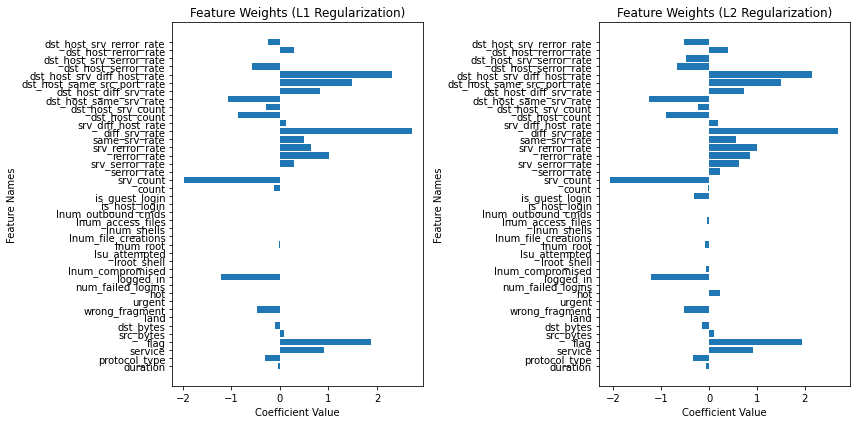

In [50]:
import matplotlib.pyplot as plt

# Train Logistic Regression model with L1 regularization
logistic_reg_l1 = LogisticRegression(penalty='l1', solver='saga', max_iter=3000, random_state=42)
logistic_reg_l1.fit(X_train, y_train)

# Train Logistic Regression model with L2 regularization
logistic_reg_l2 = LogisticRegression(penalty='l2', max_iter=3000, random_state=42)
logistic_reg_l2.fit(X_train, y_train)

# Calculate accuracies for L1 and L2 models
accuracy_l1 = logistic_reg_l1.score(X_test, y_test)
accuracy_l2 = logistic_reg_l2.score(X_test, y_test)

print(f"Accuracy with L1 regularization: {accuracy_l1:.2f}")
print(f"Accuracy with L2 regularization: {accuracy_l2:.2f}")

# Get feature coefficients for L1 and L2 models
coefficients_l1 = logistic_reg_l1.coef_[0]
coefficients_l2 = logistic_reg_l2.coef_[0]

# Plot feature weights for L1 and L2 models
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(range(len(coefficients_l1)), coefficients_l1, tick_label=feature_names)
plt.title('Feature Weights (L1 Regularization)')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature Names')

plt.subplot(1, 2, 2)
plt.barh(range(len(coefficients_l2)), coefficients_l2, tick_label=feature_names)
plt.title('Feature Weights (L2 Regularization)')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature Names')

plt.tight_layout()
plt.show()



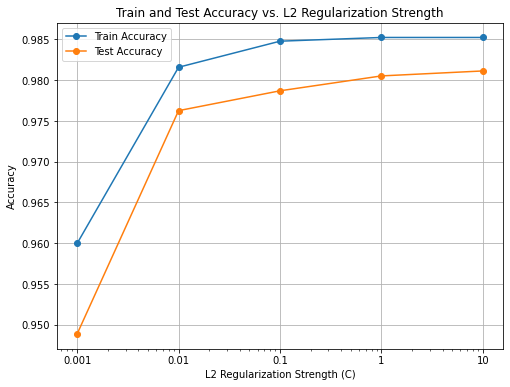

In [51]:
# Different regularization strengths to try
l2_strengths = [0.001, 0.01, 0.1, 1, 10]

# Lists to store train and test accuracies for each regularization strength
train_accuracies = []
test_accuracies = []

for strength in l2_strengths:
    # Train Logistic Regression model with L2 regularization and the specified strength
    logistic_reg_l2 = LogisticRegression(penalty='l2', C=strength, max_iter=1000, random_state=42)
    logistic_reg_l2.fit(X_train, y_train)

    # Calculate train and test accuracies
    train_accuracy = logistic_reg_l2.score(X_train, y_train)
    test_accuracy = logistic_reg_l2.score(X_test, y_test)

    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# Plot train and test accuracies vs. regularization strength
plt.figure(figsize=(8, 6))
plt.semilogx(l2_strengths, train_accuracies, marker='o', label='Train Accuracy')
plt.semilogx(l2_strengths, test_accuracies, marker='o', label='Test Accuracy')
plt.xlabel('L2 Regularization Strength (C)')
plt.ylabel('Accuracy')
plt.title('Train and Test Accuracy vs. L2 Regularization Strength')
plt.xticks(l2_strengths, l2_strengths)
plt.legend()
plt.grid(True)
plt.show()